In [78]:
import catboost

In [40]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
df = pd.read_csv('C:/Users/gopal/OneDrive/Desktop/FLASK/train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [42]:
df.shape

(74111, 29)

In [43]:
df = df.rename(columns={
'id': 'hotel id'
})
df

,hotel id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [44]:
df= df.drop(['amenities', 'host_has_profile_pic', 'first_review', 'last_review', 'host_response_rate', 'review_scores_rating','zipcode'],axis=1)
df.head()

,hotel id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,thumbnail_url,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,2012-03-26,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,2017-06-19,t,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,https://a0.muscache.com/im/pictures/348a55fe-4...,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,2016-10-25,t,40.808110,-73.943756,The Garden Oasis,Harlem,10,https://a0.muscache.com/im/pictures/6fae5362-9...,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,...,2015-04-19,f,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,https://a0.muscache.com/im/pictures/72208dad-9...,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,2015-03-01,t,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,NaN,0.0,1.0


In [45]:
df.isnull().sum()

hotel id                     0
log_price                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                  200
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_identity_verified     188
host_since                 188
instant_bookable             0
latitude                     0
longitude                    0
name                         0
neighbourhood             6872
number_of_reviews            0
thumbnail_url             8216
bedrooms                    91
beds                       131
dtype: int64

In [46]:
df.describe()

,hotel id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,10.000000,18.000000


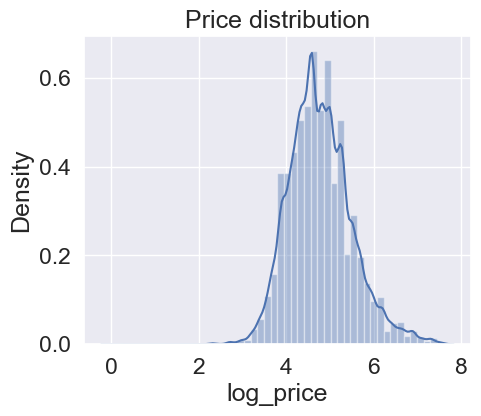

In [47]:
plt.figure(figsize = (5, 4))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

<Axes: xlabel='room_type', ylabel='count'>

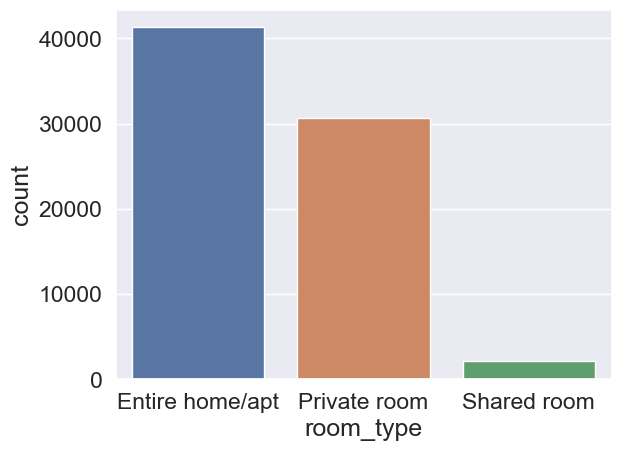

In [48]:
sns.countplot(x='room_type', data=df)

<Axes: xlabel='city', ylabel='count'>

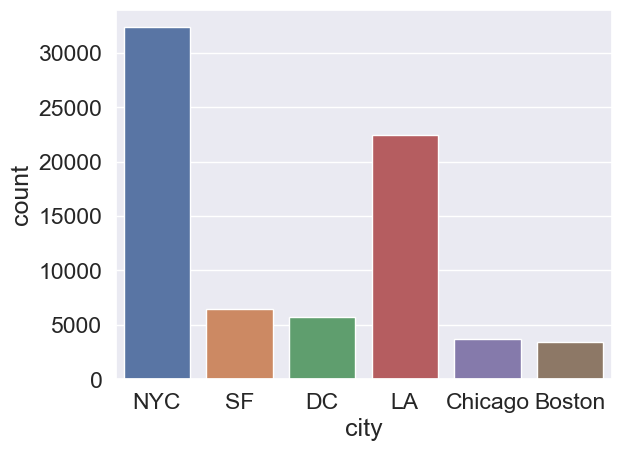

In [49]:
sns.countplot(x='city', data=df)

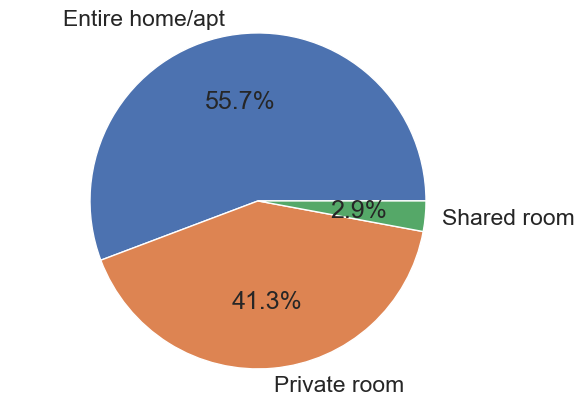

In [50]:
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

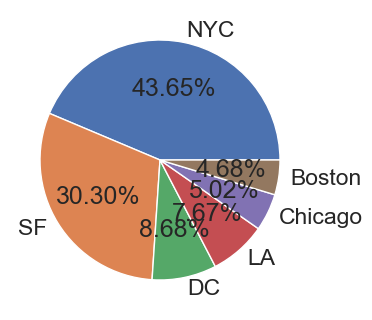

In [51]:
fig =plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students,labels = langs, autopct='%1.2f%%')
plt.show()

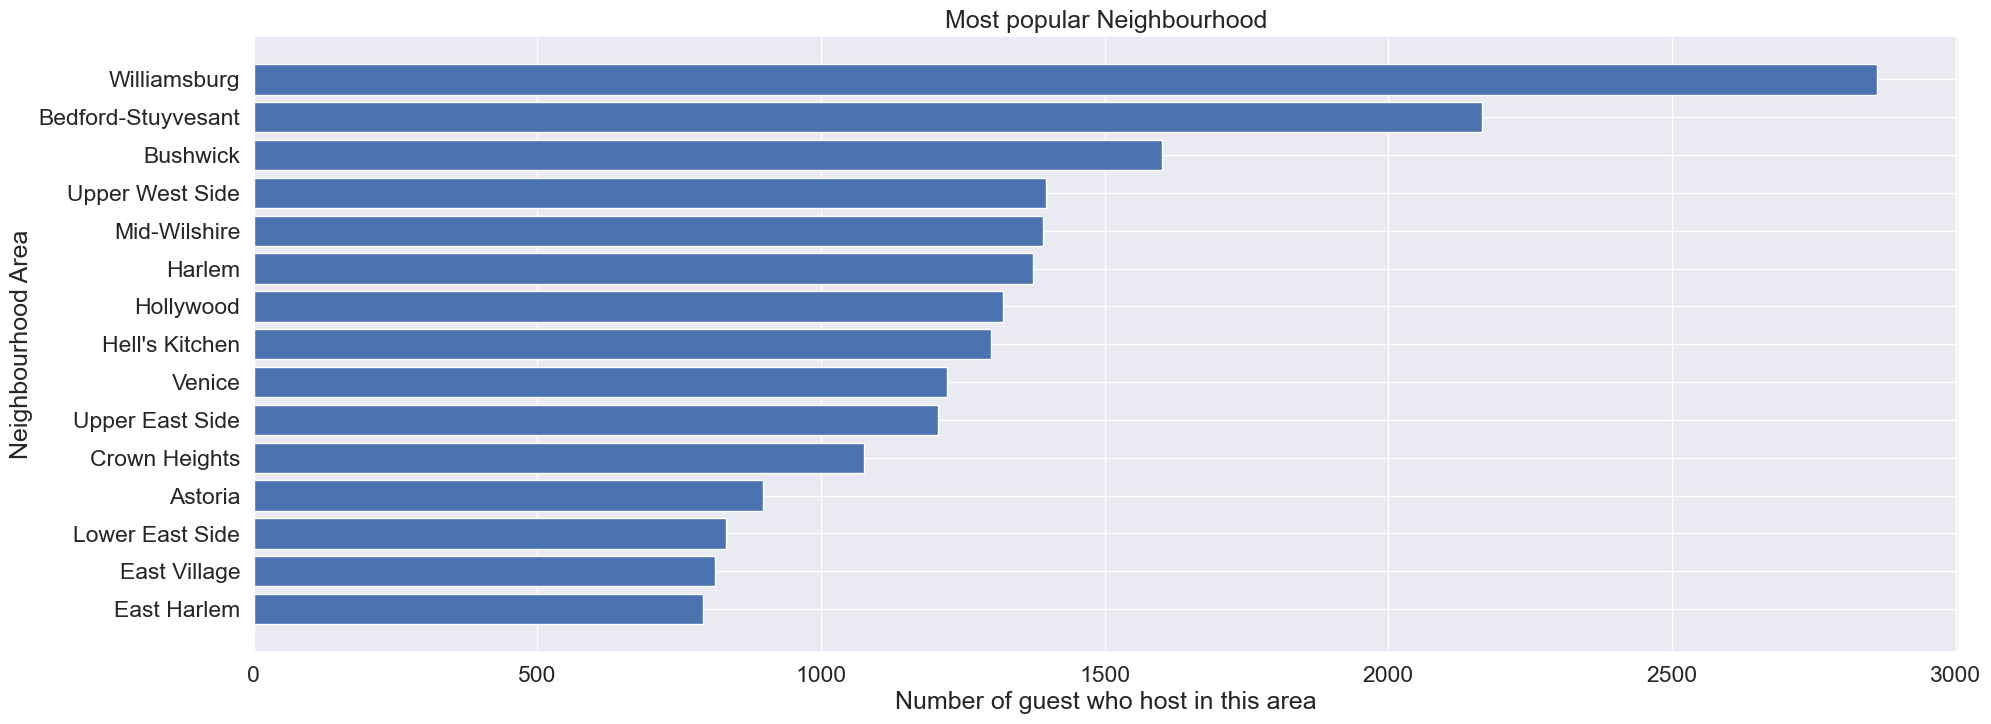

In [52]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()
plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")
plt.barh(x,y)
plt.show()

<Axes: xlabel='cancellation_policy', ylabel='count'>

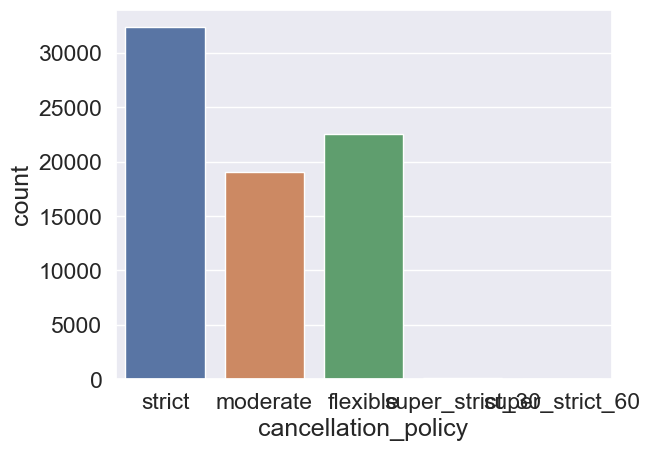

In [53]:
sns.countplot(x='cancellation_policy', data=df)

<Axes: xlabel='cleaning_fee', ylabel='count'>

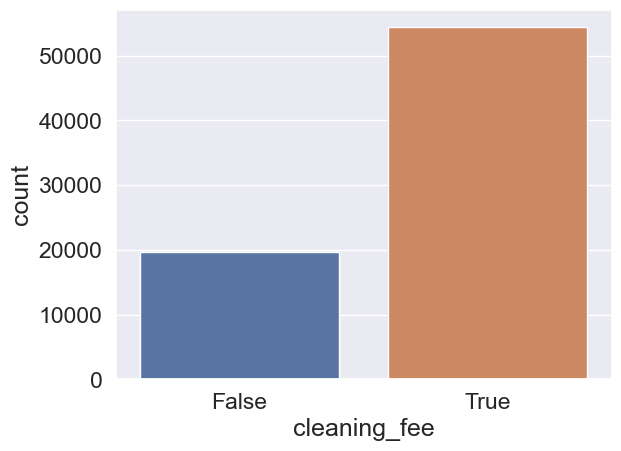

In [54]:
sns.countplot(x='cleaning_fee', data=df)

<Axes: xlabel='bed_type', ylabel='count'>

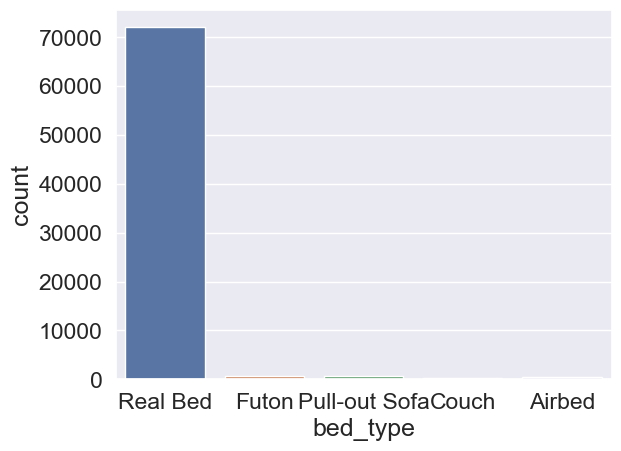

In [55]:
sns.countplot(x='bed_type', data=df)

In [56]:
def plot_violinplot(h, v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

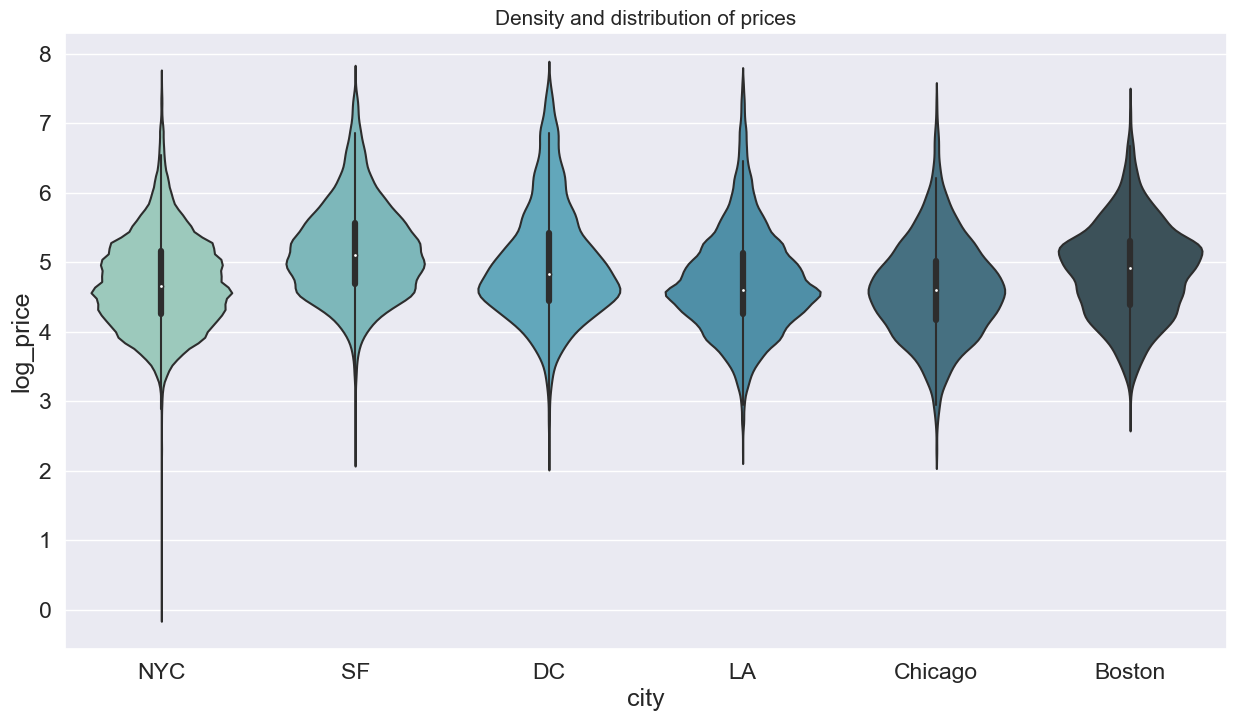

In [57]:
plot_violinplot("city","log_price")

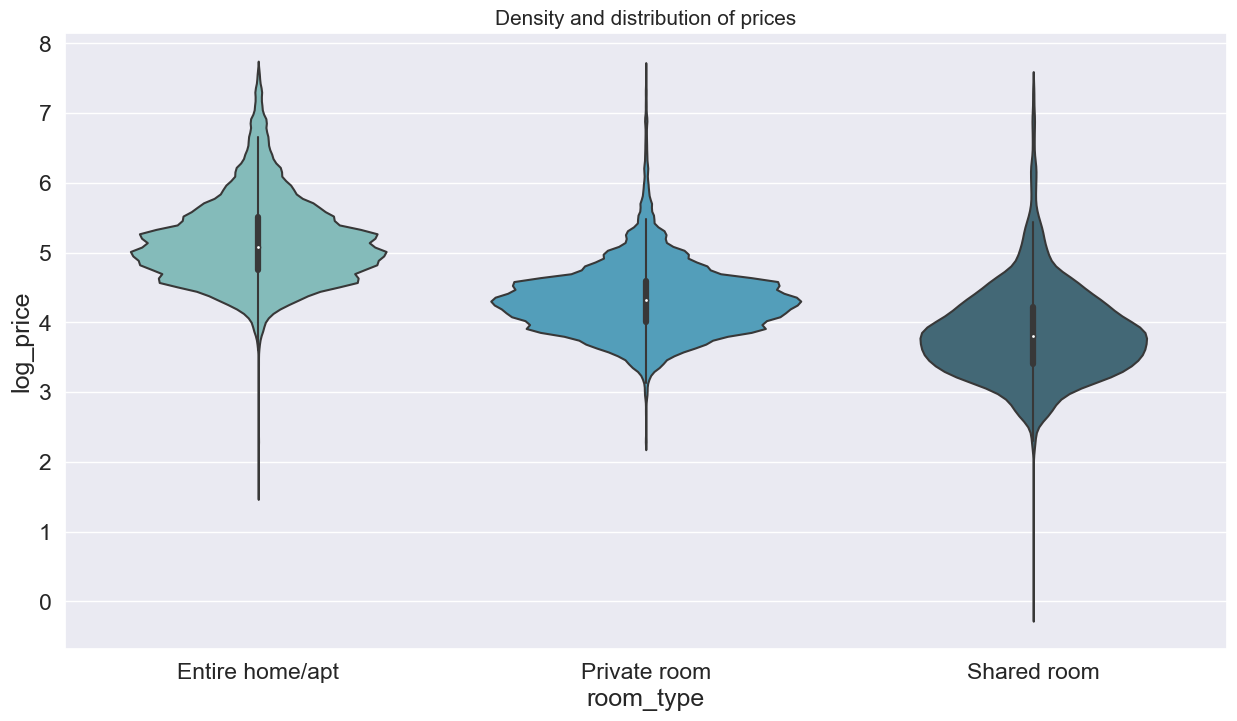

In [58]:
plot_violinplot("room_type","log_price")

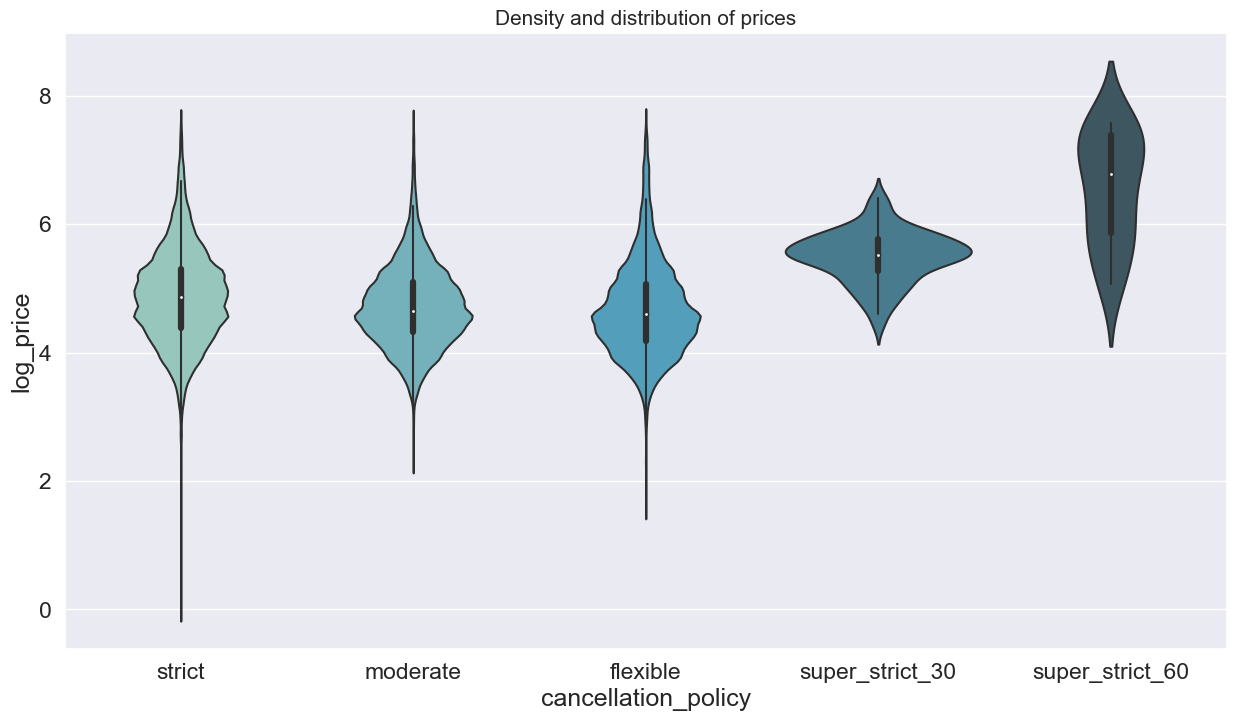

In [59]:
plot_violinplot("cancellation_policy","log_price")

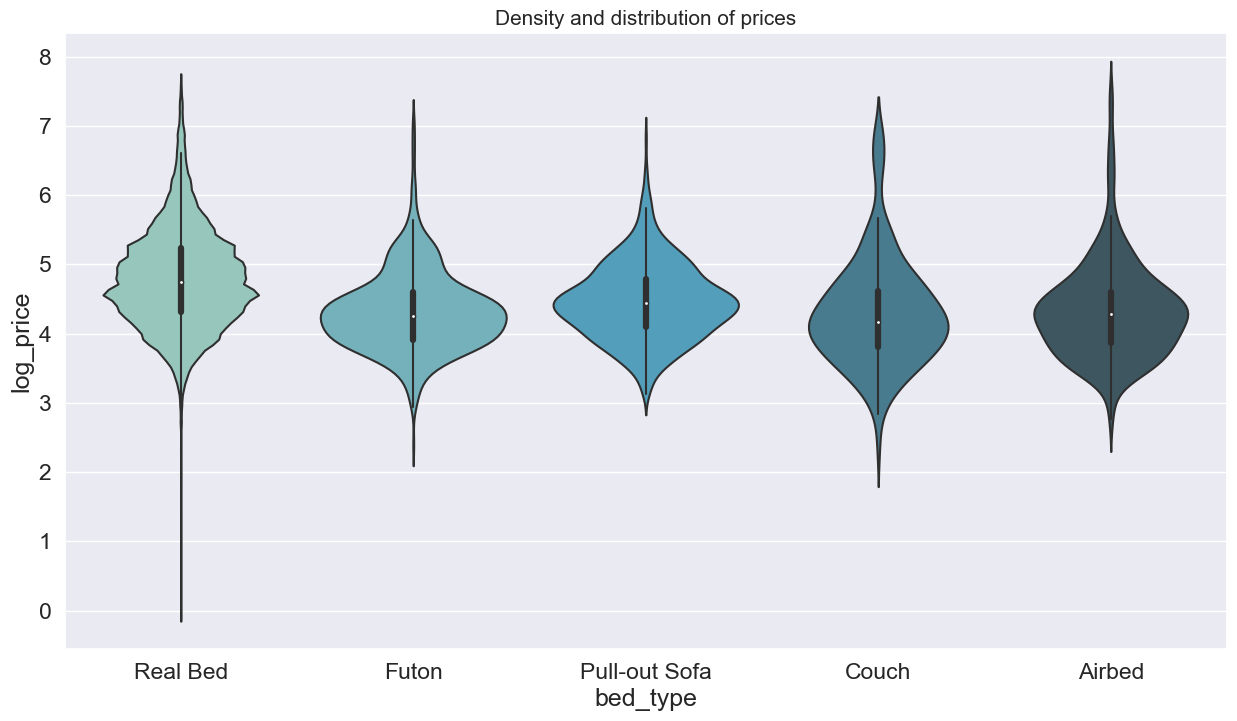

In [60]:
plot_violinplot('bed_type','log_price')

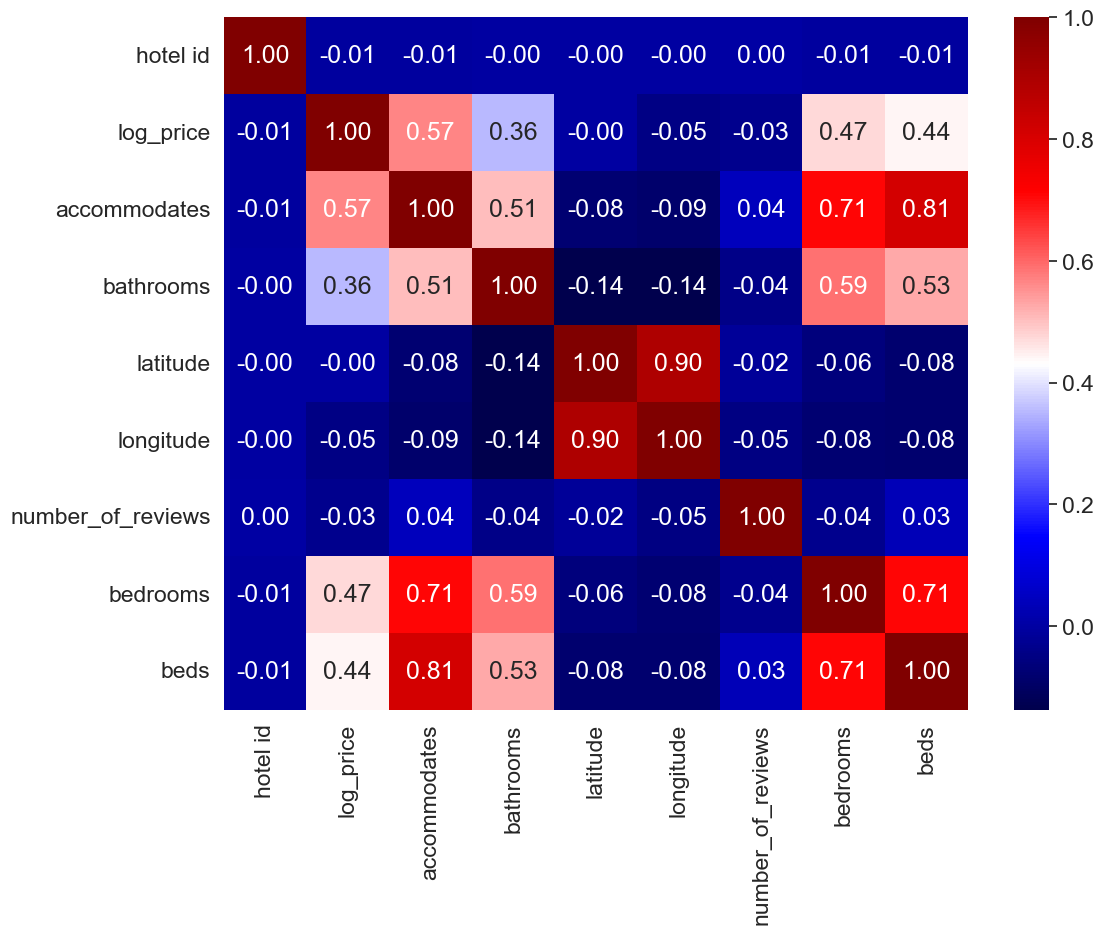

In [61]:
# Assuming 'df' is your DataFrame and you want to exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

plt.figure(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()


In [62]:
categorical_col =[]
for column in df.columns:
  if df[column].dtypes != "float64" and df[column].dtypes != "int64":
    categorical_col.append(column)
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'host_identity_verified',
 'host_since',
 'instant_bookable',
 'name',
 'neighbourhood',
 'thumbnail_url']

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print("Before encoding:",df['property_type'].unique())
df['property_type'] = le.fit_transform(df['property_type'])
print('After encoding:',df['property_type'].unique())

Before encoding: ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']
After encoding: [ 0 17 11 22 29 16 14  1  4 15 12 23  6 33  3 27 19  2 25  8  5 31 28 32
 26 18  7 10 34 13 24 30  9 21 20]


In [64]:
print('Before encoding:', df['room_type'].unique())
df['room_type'] = le. fit_transform(df['room_type'])
print ('After encoding: ',df['room_type'].unique())

Before encoding: ['Entire home/apt' 'Private room' 'Shared room']
After encoding:  [0 1 2]


In [65]:
print('Before encoding:', df['cancellation_policy'].unique())
df['cancellation_policy'] = le. fit_transform(df['cancellation_policy'])
print ('After encoding: ',df['cancellation_policy'].unique())

Before encoding: ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']
After encoding:  [2 1 0 3 4]


In [66]:
print('Before encoding:', df['cleaning_fee'].unique())
df['cleaning_fee'] = le. fit_transform(df['cleaning_fee'])
print ('After encoding: ',df['cleaning_fee'].unique())

Before encoding: [ True False]
After encoding:  [1 0]


In [67]:
print('Before encoding:', df['city'].unique())
df['city'] = le. fit_transform(df['city'])
print ('After encoding: ',df['city'].unique())

Before encoding: ['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston']
After encoding:  [4 5 2 3 1 0]


In [68]:
print('Before encoding:', df['host_identity_verified'].unique())
df['host_identity_verified'] = le. fit_transform(df['host_identity_verified'])
print ('After encoding: ',df['host_identity_verified'].unique())

Before encoding: ['t' 'f' nan]
After encoding:  [1 0 2]


In [69]:
df.host_identity_verified.fillna(method="ffill", inplace=True)
df.host_since.fillna(method='ffill', inplace=True)
df.neighbourhood.fillna(method="ffill", inplace=True)
df.bathrooms.fillna(method="ffill", inplace=True)
df.beds.fillna(method="ffill", inplace=True)
df['bedrooms'] = df['bathrooms'].fillna((df['bathrooms'].median()))

In [70]:
df.isnull().sum()

hotel id                     0
log_price                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
host_identity_verified       0
host_since                   0
instant_bookable             0
latitude                     0
longitude                    0
name                         0
neighbourhood                0
number_of_reviews            0
thumbnail_url             8216
bedrooms                     0
beds                         0
dtype: int64

In [71]:
df = df.drop(['thumbnail_url'],axis=1)
df['instant_bookable'] = df['instant_bookable'].replace('f',0)
df['instant_bookable'] = df['instant_bookable'].replace('t',1)
x=df.iloc[:,[0,2,3,4,7,8,9,11,13,14,15,18,19]]
x.head(20)

,hotel id,property_type,room_type,accommodates,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,bedrooms
0,6901257,0,0,3,2,1,4,1,0,40.696524,-73.991617,2,1.0
1,6304928,0,0,7,2,1,4,0,1,40.766115,-73.989040,6,1.0
2,7919400,0,0,5,1,1,4,1,1,40.808110,-73.943756,10,1.0
3,13418779,17,0,4,0,1,5,1,0,37.772004,-122.431619,0,1.0
4,3808709,0,0,2,1,1,2,1,1,38.925627,-77.034596,4,1.0
5,12422935,0,1,2,2,1,5,1,1,37.753164,-122.429526,3,1.0
6,11825529,0,0,3,1,1,3,0,1,33.980454,-118.462821,15,1.0
7,13971273,11,0,2,1,1,3,1,0,34.046737,-118.260439,9,1.0
8,180792,17,1,2,1,1,5,0,0,37.781128,-122.501095,159,1.0
9,5385260,17,1,2,1,1,3,0,1,33.992563,-117.895997,2,1.0


In [72]:
y=df.iloc[:,1]
y.head(20)

0     5.010635
1     5.129899
2     4.976734
3     6.620073
4     4.744932
5     4.442651
6     4.418841
7     4.787492
8     4.787492
9     3.583519
10    4.605170
11    5.010635
12    4.248495
13    5.298317
14    4.955827
15    4.094345
16    4.317488
17    4.595120
18    4.882802
19    4.595120
Name: log_price, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(55583, 13)
(18528, 13)
(55583,)
(18528,)


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)
print("\nMean Absolute Error of Linear Regression:",mae_lr)
print("\nMean Squared Error of Linear Regression:",mse_lr)
print("\nRoot Mean Squared Error of Linear Regression :",rmse_lr)
print("\nR2 Score of Linear Regression:",r2_lr)


Mean Absolute Error of Linear Regression: 0.3744231905936119

Mean Squared Error of Linear Regression: 0.2452591075513243

Root Mean Squared Error of Linear Regression : 0.4952364158170563

R2 Score of Linear Regression: 0.5245417721961967


In [79]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)
print("\nMean Absolute Error of Linear Regression:",mae_rf)
print("\nMean Squared Error of Linear Regression:",mse_rf)
print("\nRoot Mean Squared Error of Linear Regression :",rmse_rf)
print("\nR2 Score of Linear Regression:",r2_rf)


Mean Absolute Error of Linear Regression: 0.2937411573771271

Mean Squared Error of Linear Regression: 0.16181748083621397

Root Mean Squared Error of Linear Regression : 0.40226543579608476

R2 Score of Linear Regression: 0.686301342958439


In [ ]:
from sklearn.linear_model import Ridge
model = Pipeline([ ('poly', PolynomialFeatures()),
     ('ridge',Ridge(fit_intercept=True))
])
param_grid = {
'poly__degree': [1, 2, 3],
'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}
# Perform grid search with 5-fold cross-validation
poly_tuned = GridSearchCV(model, param_grid, cv=5)
#Traning and Testing
poly_tuned.fit(X_train_scaled, y_train)
y_pred_poly = poly_tuned.predict(X_test_scaled)
mae_poly = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics. mean_squared_error(y_test, y_pred_poly))
r2_poly = metrics.r2_score(y_test, y_pred_poly)
print('\nMean Absolute Error of Polynomial Regression:',mae_poly)
print('\nMean Squarred Error of Polynomial Regression:',mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression:',rmse_poly)
print('\nR2 Score of Polynomial Regression:',r2_poly)


Mean Absolute Error of Polynomial Regression: 0.32684303941755943

Mean Squarred Error of Polynomial Regression: 0.19114508534786434

Root Mean Squarred Error of Polynomial Regression: 0.43720142422899805

R2 Score of Polynomial Regression: 0.6294469777686689


In [ ]:
gb = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,max_depth=10)
gb.fit(X_train_scaled,y_train)
y_pred_gb = gb.predict(X_test_scaled)
mae_gb = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb = metrics.r2_score(y_test, y_pred_gb)
print("\nMean Absolute Error of Gradient Boosting:",mae_gb)
print("\nMean Squarred Error of Gradient Boosting:",mse_gb)
print("\nRoot Mean Squarred Error of Gradient Boosting:",rmse_gb)
print("\nR2 Score of Gradient Boosting:",r2_gb)


Mean Absolute Error of Gradient Boosting: 0.29633045944797637

Mean Squarred Error of Gradient Boosting: 0.1644339921254401

Root Mean Squarred Error of Gradient Boosting: 0.40550461418514105

R2 Score of Gradient Boosting: 0.6812289856746477


In [ ]:
model_CBR = CatBoostRegressor()
model_CBR.fit(X_train_scaled, y_train)
cross_val_score(model_CBR, X_train_scaled, y_train,
scoring= 'r2',
cv=KFold(n_splits=5,
shuffle=True,
random_state=2022,
))
y_pred_cbr = model_CBR.predict(X_test_scaled)
mae_cbr = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr = metrics.r2_score(y_test, y_pred_cbr)
print ('\nMean Absolute Error of CatBoost Regressor:',mae_cbr)
print ('\nMean Squarred Error of CatBoost Regressor:',mse_cbr)
print ('\nRoot Mean Squarred Error of CatBoost Regressor:',rmse_cbr)
print ('\nR2 Score of CatBoost Regressor:',r2_cbr)


Learning rate set to 0.077247
0:	learn: 0.6890448	total: 136ms	remaining: 2m 15s
1:	learn: 0.6643269	total: 143ms	remaining: 1m 11s
2:	learn: 0.6421229	total: 149ms	remaining: 49.6s
3:	learn: 0.6221895	total: 154ms	remaining: 38.4s
4:	learn: 0.6035970	total: 160ms	remaining: 31.8s
5:	learn: 0.5885524	total: 165ms	remaining: 27.4s
6:	learn: 0.5740073	total: 170ms	remaining: 24.2s
7:	learn: 0.5614782	total: 176ms	remaining: 21.9s
8:	learn: 0.5507165	total: 181ms	remaining: 19.9s
9:	learn: 0.5394084	total: 187ms	remaining: 18.5s
10:	learn: 0.5302308	total: 193ms	remaining: 17.3s
11:	learn: 0.5222404	total: 201ms	remaining: 16.6s
12:	learn: 0.5136808	total: 206ms	remaining: 15.6s
13:	learn: 0.5077111	total: 215ms	remaining: 15.1s
14:	learn: 0.5009119	total: 220ms	remaining: 14.4s
15:	learn: 0.4955629	total: 233ms	remaining: 14.3s
16:	learn: 0.4902068	total: 238ms	remaining: 13.7s
17:	learn: 0.4860194	total: 247ms	remaining: 13.5s
18:	learn: 0.4816758	total: 251ms	remaining: 13s
19:	learn: 

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
mae_xgb = metrics.mean_absolute_error(y_test,y_pred_xgb)
mse_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb = metrics.r2_score(y_test,y_pred_xgb)
print("\nMean Absolute Error of XGBoost Regressor:",mae_xgb)
print("\n Mean Squarred Error of XGBoost Regressor:",mse_xgb)
print("\nRoot Mean Squarred Error of XGBoost Regressor:",rmse_xgb)
print("\nR2 Score of XGBoost Regressor:",r2_xgb)


Mean Absolute Error of XGBoost Regressor: 0.29070901481876393

 Mean Squarred Error of XGBoost Regressor: 0.1553515719155943

Root Mean Squarred Error of XGBoost Regressor: 0.39414663757996754

R2 Score of XGBoost Regressor: 0.6988361255694999


In [ ]:
r2_list = {"Linear Regression": r2_lr,
"Random Forest": r2_rf,
"Polynomial Regression": r2_poly,
"Gradient Boosting" :r2_gb,
"Catboost" : r2_cbr,
"XGBoost": r2_xgb}
mae_list = {"Linear regression": mae_lr,
"Random Forest": mae_rf,
"Polynomial Regression":mae_poly,
"Gradient Boosting" :mae_gb,
"CatBoost": mae_cbr,
"XGBoost": mae_xgb}
mse_list ={"Linear Regression": mse_lr,
"Random Forest": mse_rf,
"Polynomial Regression":mse_poly,
"Gradient Boosting":mse_gb,
"CatBoost": mse_cbr,
"XGBoost": mse_xgb}
rmse_list = {"Linear Regression": rmse_lr,
"Random Forest": rmse_rf,
"Polynomial Regression": rmse_poly,
"Gradient Boosting" :rmse_gb,
"CatBoost": rmse_cbr,
"XGBoost":rmse_xgb}

In [ ]:
a1 = pd.DataFrame.from_dict(r2_list,orient='index',columns=["R2 SCORE"])
a2 = pd.DataFrame.from_dict(mae_list,orient='index',columns=["MEAN ABSOLUTE ERROR"])
a3 = pd.DataFrame.from_dict(mse_list,orient='index',columns=["MEAN SQUARRED ERROR"])
a4 = pd.DataFrame.from_dict(rmse_list,orient='index',columns=["ROOT MEAN SQUARRED ERROR"])

In [ ]:
org=pd.concat([a1,a2,a3,a4],axis=1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.524542,NaN,0.245259,0.495236
Random Forest,0.686915,0.293425,0.161501,0.401872
Polynomial Regression,0.629447,0.326843,0.191145,0.437201
Gradient Boosting,0.681229,0.296330,0.164434,0.405505
Catboost,0.707460,NaN,NaN,NaN
XGBoost,0.698836,0.290709,0.155352,0.394147
Linear regression,NaN,0.374423,NaN,NaN
CatBoost,NaN,0.286408,0.150903,0.388463


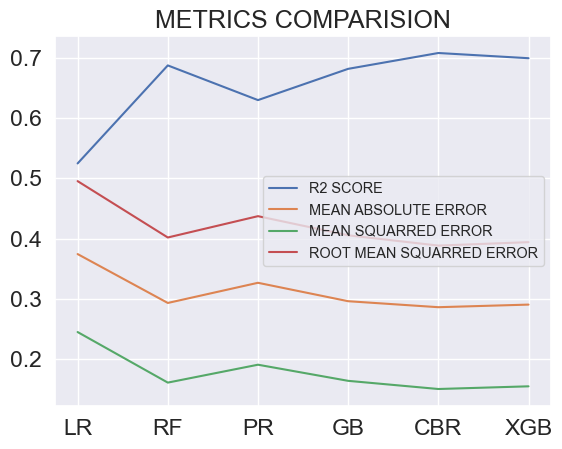

In [ ]:
alg = ['LR', 'RF', 'PR', 'GB', 'CBR', 'XGB']
plt.plot(alg, a1)
plt.plot(alg, a2)
plt.plot(alg,a3)
plt.plot(alg, a4)
legend = ["R2 SCORE", "MEAN ABSOLUTE ERROR", "MEAN SQUARRED ERROR", "ROOT MEAN SQUARRED ERROR"]
plt.title("METRICS COMPARISION")
plt.legend(legend, loc= 'right', fontsize='xx-small')
plt.show()

In [ ]:
import pickle

pickle.dump(model_CBR, open('Airbnb_model.pkl', 'wb'))

In [ ]:
model = pickle.load(open('Airbnb_model.pkl', 'rb'))
print(model.predict([[180792, 17,1,2,1,1,5,0,0, 37.781128,-122.501095,159,1.0]]))

[5.30523722]


In [ ]:
model = pickle.load(open('Airbnb_model.pkl','rb'))
print(model.predict([[18224863, 17,0,8,2,1,4,0,1,40.643773,-73.950855,5,3]]))

[5.44440923]
